In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

url = 'https://baseball.yahoo.co.jp/npb/game/2021005818/score?index=0110100'

#データフレームを用意
result = pd.DataFrame()

#1秒待機
time.sleep(1)
#read_htmlでデータを取得
df = pd.read_html(url, encoding='utf-8')
#投球数、球種、球速、結果、投手、打者、スコアを取得
result = df[14].drop('投球数.1', axis=1)
result['投手'] = df[13].loc[0, '投手']
result['打者'] = df[13].loc[0, '打者']
result['スコア'] = '-'.join(map(str, df[1].iloc[:, 1].tolist()))

#1秒待機
time.sleep(1)
#BeautifulSoupでデータを取得
r = requests.get(url)
soup = BeautifulSoup(r.content, 'html.parser')
#投球コースを取得
Chart = soup.find('div', class_= 'bb-allocationChart').find_all('span', class_='bb-icon__ballCircle')
chart = [c['style'] for c in Chart]
result['投球コース'] = chart

In [4]:
result
#topは上から何pxかどうか
#leftは画面左から何pxかどうか

,投球数,球種,球速,結果,投手,打者,スコア,投球コース
0,1,ストレート,142km/h,ボール,和田 毅,塩見 泰隆,0-0,top:19px; left:13px;
1,2,ストレート,143km/h,見逃し,和田 毅,塩見 泰隆,0-0,top:93px; left:48px;
2,3,ストレート,142km/h,ファウル,和田 毅,塩見 泰隆,0-0,top:16px; left:102px;
3,4,ストレート,144km/h,ボール,和田 毅,塩見 泰隆,0-0,top:156px; left:104px;
4,5,ストレート,145km/h,空三振,和田 毅,塩見 泰隆,0-0,top:124px; left:112px;


In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

url = 'https://baseball.yahoo.co.jp/npb/game/2021005818/score?index=0110100'
#データフレームを用意
df_result = pd.DataFrame()

for i in range(1000):
    #1秒待機
    time.sleep(1)
    #read_htmlでデータを取得
    df = pd.read_html(url, encoding='utf-8')
    #BeautifulSoupでデータを取得
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    #「次へ」ボタンからURLを取得
    try:
        next = soup.find('a', id= 'btn_next').get('href')
    except:
        break
    
    if len(df) == 19: 
        #投球数、球種、球速、結果、投手、打者、スコアを取得
        result = df[14].drop('投球数.1', axis=1)
        result['投手'] = df[13].loc[0, '投手']
        result['打者'] = df[13].loc[0, '打者']
        result['スコア'] = '-'.join(map(str, df[1].iloc[:, 1].tolist()))
        
        #投球コースを取得
        Course = soup.find('div', class_= 'bb-allocationChart').find_all('span', class_='bb-icon__ballCircle')
        course = [c['style'] for c in Course]
        result['投球コース'] = course

        #データフレームを結合
        df_result = pd.concat([df_result, result])
    
    #次のページのURLに更新
    url = 'https://baseball.yahoo.co.jp' + next

In [11]:
df_result.head()

,投球数,球種,球速,結果,投手,打者,スコア,投球コース
0,1,ストレート,142km/h,ボール,和田 毅,塩見 泰隆,0-0,top:19px; left:13px;
1,2,ストレート,143km/h,見逃し,和田 毅,塩見 泰隆,0-0,top:93px; left:48px;
2,3,ストレート,142km/h,ファウル,和田 毅,塩見 泰隆,0-0,top:16px; left:102px;
3,4,ストレート,144km/h,ボール,和田 毅,塩見 泰隆,0-0,top:156px; left:104px;
4,5,ストレート,145km/h,空三振,和田 毅,塩見 泰隆,0-0,top:124px; left:112px;


In [8]:
#ここからは可視化のコード

In [14]:
import pandas as pd
df_result.head()

,投球数,球種,球速,結果,投手,打者,スコア,投球コース
0,1,ストレート,142km/h,ボール,和田 毅,塩見 泰隆,0-0,top:19px; left:13px;
1,2,ストレート,143km/h,見逃し,和田 毅,塩見 泰隆,0-0,top:93px; left:48px;
2,3,ストレート,142km/h,ファウル,和田 毅,塩見 泰隆,0-0,top:16px; left:102px;
3,4,ストレート,144km/h,ボール,和田 毅,塩見 泰隆,0-0,top:156px; left:104px;
4,5,ストレート,145km/h,空三振,和田 毅,塩見 泰隆,0-0,top:124px; left:112px;


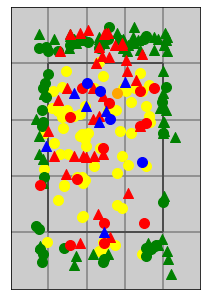

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import re

#データdfを用意してください
df = df_result

#いらない文字を削除
df['結果'] = df['結果'].str.split(' ', expand=True)[0]
df['球速'] = df['球速'].str.replace('km/h', '')

#高さとコースにわける
df_split = df['投球コース'].str.extract('top:(\d+)px; left:(\d+)px;', expand=True)
df['投球コース(top)'] = df_split[0].astype(int)
df['投球コース(left)'] = df_split[1].astype(int)
df = df.drop('投球コース', axis=1)

#結果からストライク、ボール、アウト、ヒット、ホームランにわける
df['結果2'] = df['結果'].replace({'空振り': 'ストライク', '見逃し': 'ストライク', 'ファウル': 'ストライク',
'ボール': 'ボール'})
df['結果2'] = df['結果2'].replace(re.compile(r'.*飛'), 'アウト',regex=True)
df['結果2'] = df['結果2'].replace(re.compile(r'.併.'), 'アウト',regex=True)
df['結果2'] = df['結果2'].replace(re.compile(r'.ゴロ'), 'アウト',regex=True)
df['結果2'] = df['結果2'].replace(re.compile(r'.三振'), 'アウト',regex=True)
df['結果2'] = df['結果2'].replace(re.compile(r'.犠.'), 'アウト',regex=True)
df['結果2'] = df['結果2'].replace(re.compile(r'.直'), 'アウト',regex=True)
df['結果2'] = df['結果2'].replace(re.compile(r'.安'), 'ヒット',regex=True)
df['結果2'] = df['結果2'].replace(re.compile(r'.２'), 'ヒット',regex=True)
df['結果2'] = df['結果2'].replace(re.compile(r'.３'), 'ヒット',regex=True)
df['結果2'] = df['結果2'].replace(re.compile(r'.本'), 'ホームラン',regex=True)

#球種からストレートと変化球にわける
df['球種2'] = df['球種'].where(df['球種']=='ストレート', '変化球')

#球種、結果によってデータをわける
#ストライク（ストレート）
df_strike_fast = df[(df['結果2'] == 'ストライク') & (df['球種2'] == 'ストレート')]
#ストライク（変化球）
df_strike_break = df[(df['結果2'] == 'ストライク') & (df['球種2'] == 'ボール')]
#ボール（ストレート）
df_ball_fast = df[(df['結果2'] == 'ボール') & (df['球種2'] == 'ストレート')]
#ボール（変化球）
df_ball_break = df[(df['結果2'] == 'ボール') & (df['球種2'] == '変化球')]
#アウト（ストレート）
df_out_fast = df[(df['結果2'] == 'アウト') & (df['球種2'] == 'ストレート')]
#アウト（変化球）
df_out_break = df[(df['結果2'] == 'アウト') & (df['球種2'] == '変化球')]
#ヒット（ストレート）
df_hit_fast = df[(df['結果2'] == 'ヒット') & (df['球種2'] == 'ストレート')]
#ヒット（変化球）
df_hit_break = df[(df['結果2'] == 'ヒット') & (df['球種2'] == '変化球')]
#ホームラン（ストレート）
df_homerun_fast = df[(df['結果2'] == 'ホームラン') & (df['球種2'] == 'ストレート')]
#ホームラン（変化球）
df_homerun_break = df[(df['結果2'] == 'ホームラン') & (df['球種2'] == '変化球')]

#matplotlibで散布図を書く
fig ,ax = plt.subplots(figsize= (3.4,5.2))
ax.set_facecolor('0.8')

#グラフの範囲を設定
ax.set_xlim([-13, 153])
ax.set_ylim([-7, 177])
#グラフの目盛り値を非表示
ax.set_xticks([])
ax.set_yticks([])

#ストライクゾーンを設定
y_min = 30
y_max = 140
x_min = 20
x_max = 120

#ストライクゾーンや補助線を書く
#補助線
ax.hlines((y_max-y_min)/3+y_min, -13, 153, color ='gray', linestyles='solid', label='', zorder=0)
ax.hlines(y_max-(y_max-y_min)/3, -13, 153, color ='gray', linestyles='solid', label='', zorder=0)
ax.hlines(y_min, -13, 153, color ='gray', linestyles='solid', label='', zorder=0)
ax.hlines(y_max, -13, 153, color ='gray', linestyles='solid', label='', zorder=0)
ax.vlines((x_max-x_min)/3 + x_min, -7, 177, colors='gray', linestyles='solid', label='', zorder=0)
ax.vlines(x_max - (x_max - x_min)/3, -7, 177, colors='gray', linestyles='solid', label='', zorder=0)
ax.vlines(x_min, -7, 177, colors='gray', linestyles='solid', label='', zorder=0)
ax.vlines(x_max, -7, 177, colors='gray', linestyles='solid', label='', zorder=0)
#ストライクゾーン
ax.hlines(y_min, x_min, x_max, color ='0.3', linestyles='solid', label='', zorder=1, linewidth=2)
ax.hlines(y_max, x_min, x_max, color ='0.3', linestyles='solid', label='', zorder=1, linewidth=2)
ax.vlines(x_max, y_min, y_max, colors='0.3', linestyles='solid', label='', zorder=1, linewidth=2)
ax.vlines(x_min, y_min, y_max, colors='0.3', linestyles='solid', label='', zorder=1, linewidth=2)

#ストライク（ストレート）
ax.scatter(df_strike_fast['投球コース(left)'],df_strike_fast['投球コース(top)'],c='yellow',marker='o', s=100)
#ストライク（変化球）
ax.scatter(df_strike_break['投球コース(left)'],df_strike_break['投球コース(top)'],c='yellow',marker='^', s=100)
#ボール（ストレート）
ax.scatter(df_ball_fast['投球コース(left)'],df_ball_fast['投球コース(top)'],c='green', marker='o', s=100)
#ボール（変化球）
ax.scatter(df_ball_break['投球コース(left)'],df_ball_break['投球コース(top)'],c='green', marker='^', s=100)
#アウト（ストレート）
ax.scatter(df_out_fast['投球コース(left)'],df_out_fast['投球コース(top)'],c='red',marker='o', s=100)
#アウト（変化球）
ax.scatter(df_out_break['投球コース(left)'],df_out_break['投球コース(top)'],c='red',marker='^', s=100)
#ヒット（ストレート）
ax.scatter(df_hit_fast['投球コース(left)'],df_hit_fast['投球コース(top)'],c='blue',marker='o', s=100)
#ヒット（変化球）
ax.scatter(df_hit_break['投球コース(left)'],df_hit_break['投球コース(top)'],c='blue',marker='^', s=100)
#ホームラン（ストレート）
ax.scatter(df_homerun_fast['投球コース(left)'],df_homerun_fast['投球コース(top)'],c='orange',marker='o', s=100)
#ホームラン（変化球）
ax.scatter(df_homerun_break['投球コース(left)'],df_homerun_break['投球コース(top)'],c='orange',marker='^', s=100)

# プロット表示
plt.show()